<ipython-input-1-5ab916e73491>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ctr_by_platform.index, y=ctr_by_platform.values, palette='coolwarm')
<ipython-input-1-5ab916e73491>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_by_platform.index, y=conversion_by_platform.values, palette='viridis')


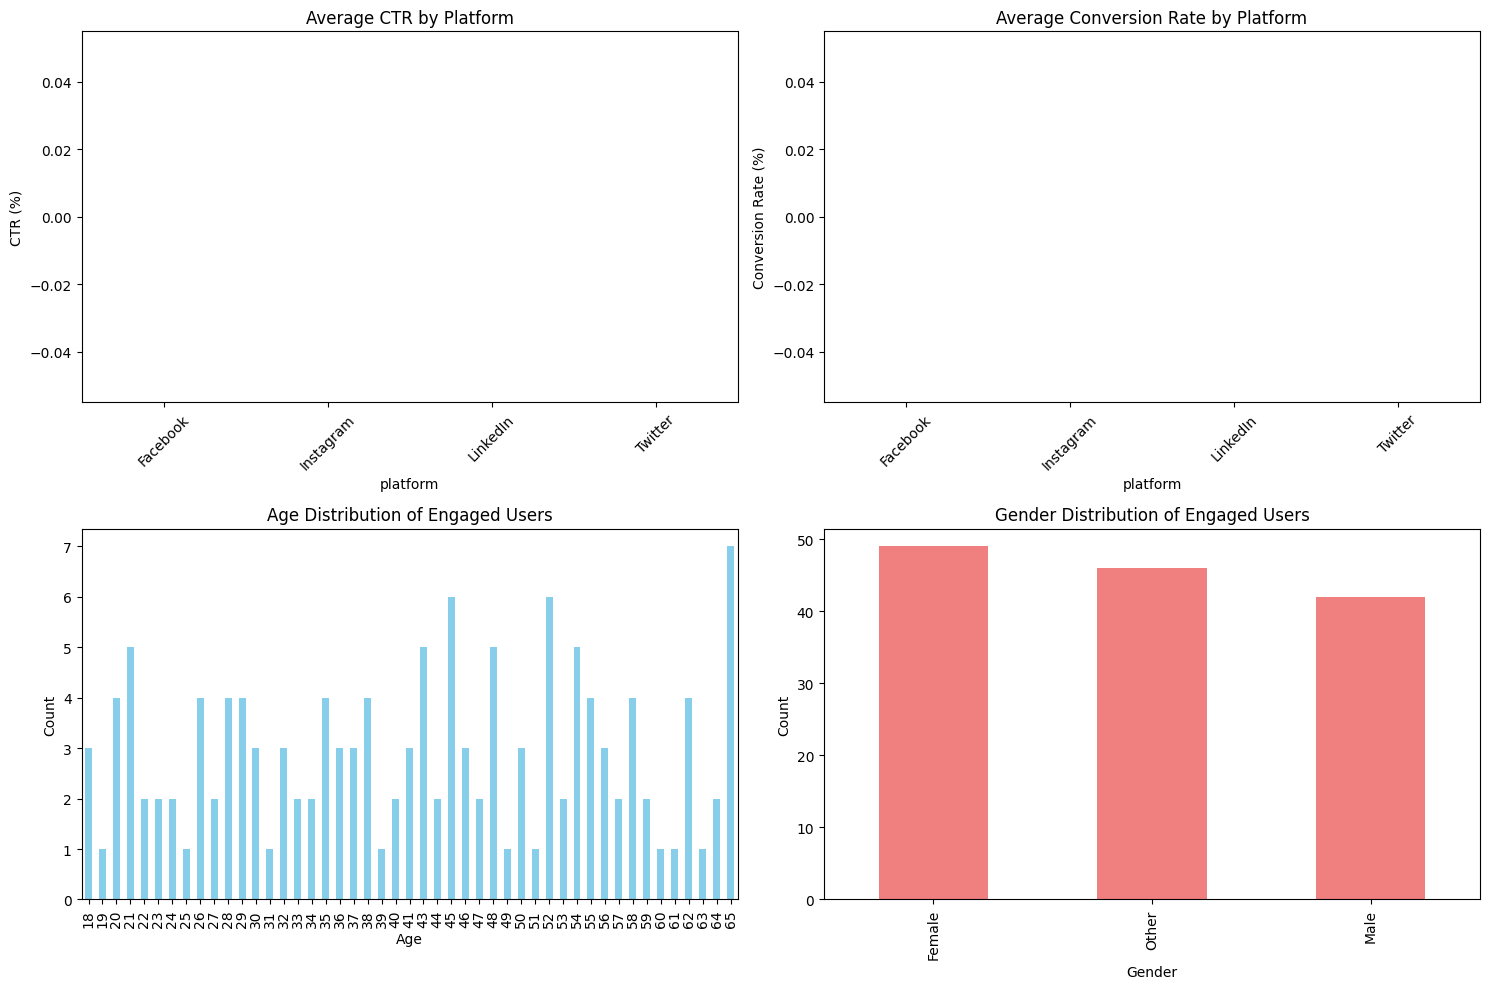

Top 10 Locations for Engagement:
 location
Los Angeles    32
Tokyo          29
Chicago        27
London         27
New York       22
Name: count, dtype: int64
Top 10 Interests for Engagement:
 interests
['gaming']                   8
['sports']                   8
['food']                     7
['travel']                   6
['fashion']                  6
['music']                    6
['technology']               6
['music', 'gaming']          3
['gaming', 'music']          3
['fashion', 'technology']    2
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Exp 5 Dataset(1).csv")

# Calculate Click-Through Rate (CTR) and Conversion Rate
df['CTR'] = (df['ad_click'] / df['ad_impression']).fillna(0) * 100
df['Conversion Rate'] = (df['conversion'] / df['ad_click']).fillna(0) * 100

# 1. CTR by Platform
ctr_by_platform = df.groupby('platform')['CTR'].mean().sort_values()

# 2. Conversion Rate by Platform
conversion_by_platform = df.groupby('platform')['Conversion Rate'].mean().sort_values()

# 3. Age and Gender Distribution of Engaged Users
engaged_users = df[df['ad_click'] > 0]
age_distribution = engaged_users['age'].value_counts().sort_index()
gender_distribution = engaged_users['gender'].value_counts()

# 4. Top Locations for Engagement
top_locations = engaged_users['location'].value_counts().head(10)

# 5. Interest-based Engagement
interest_counts = engaged_users['interests'].explode().value_counts().head(10)

# Visualization
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.barplot(x=ctr_by_platform.index, y=ctr_by_platform.values, palette='coolwarm')
plt.title("Average CTR by Platform")
plt.ylabel("CTR (%)")
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.barplot(x=conversion_by_platform.index, y=conversion_by_platform.values, palette='viridis')
plt.title("Average Conversion Rate by Platform")
plt.ylabel("Conversion Rate (%)")
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
age_distribution.plot(kind='bar', color='skyblue')
plt.title("Age Distribution of Engaged Users")
plt.xlabel("Age")
plt.ylabel("Count")

plt.subplot(2, 2, 4)
gender_distribution.plot(kind='bar', color='lightcoral')
plt.title("Gender Distribution of Engaged Users")
plt.xlabel("Gender")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

# Print insights
print("Top 10 Locations for Engagement:\n", top_locations)
print("Top 10 Interests for Engagement:\n", interest_counts)
